# RRFS 🅱

<style>
  .beta-badge {
    background-color: #f39c12;
    color: white;
    padding: 4px 8px;
    border-radius: 4px;
    font-weight: bold;
  }
</style>

<span class="beta-badge">BETA</span>

The Rapid Refresh Forecast System (RRFS) is _undergoing rapid development_. There are some prototype products and forecasts available on the cloud on AWS. Some files have an index file, others do not.


In [1]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc
from herbie import paint

import matplotlib.pyplot as plt

In [5]:
H = Herbie(
    "2024-08-15 12:00",
    model="rrfs",
    fxx=1,
    member="control",
    domain="conus",
    # product="testbed",
)

H.SOURCES

✅ Found ┊ model=rrfs ┊ product=prslev ┊ 2024-Aug-15 12:00 UTC F01 ┊ GRIB2 @ aws_0 ┊ IDX @ aws_0


{'aws_0': 'https://noaa-rrfs-pds.s3.amazonaws.com/rrfs_a/rrfs_a.20240815/12/control/rrfs.t12z.prslev.f001.conus.grib2',
 'aws_1': 'https://noaa-rrfs-pds.s3.amazonaws.com/rrfs_a/rrfs_a.20240815/12/control/rrfs.t12z.prslev.f001.conus_3km.grib2'}

In [3]:
H.help()

╭─ Herbie ────────────────────────────────
│ Help for model='rrfs'
│ 
│ Rapid Refresh Forecast System (RRFS) Ensemble
│  aws product description: https://registry.opendata.aws/noaa-rrfs/
│
│ Herbie(date, model='rrfs', ...)
│ 
│ fxx : int
│ product : {"prs", "nat", "testbed", "ififip"}
│ member : {"control", int}
│ domain : {"conus", "alaska", "hawaii", "puerto rico", None}
│ 
│ If product="natlev', then domain must be None
│
╰─────────────────────────────────────────


In [6]:
ds = H.xarray("TMP:2 m above ground")
ds

<xarray.Dataset> Size: 38MB
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 8B 2024-08-15T12:00:00
    step                 timedelta64[ns] 8B 01:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time           datetime64[ns] 8B 2024-08-15T13:00:00
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 8MB 297.3 297.3 297.3 ... 291.5 291.5
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rrfs
    product:                 prslev
    description:             Rapid Refresh Forecast System (RRFS) Ensemble
    remote_grib:             https://noaa-rrfs-pds.s3.amazonaws.com/rrfs_a/rr...
    local_grib:              /home/blaylock/data/rrfs/20240815/control/subset...
    search:                  TMP:2 m above ground

Text(0.0, 1.0, 'RRFS: member=control ')

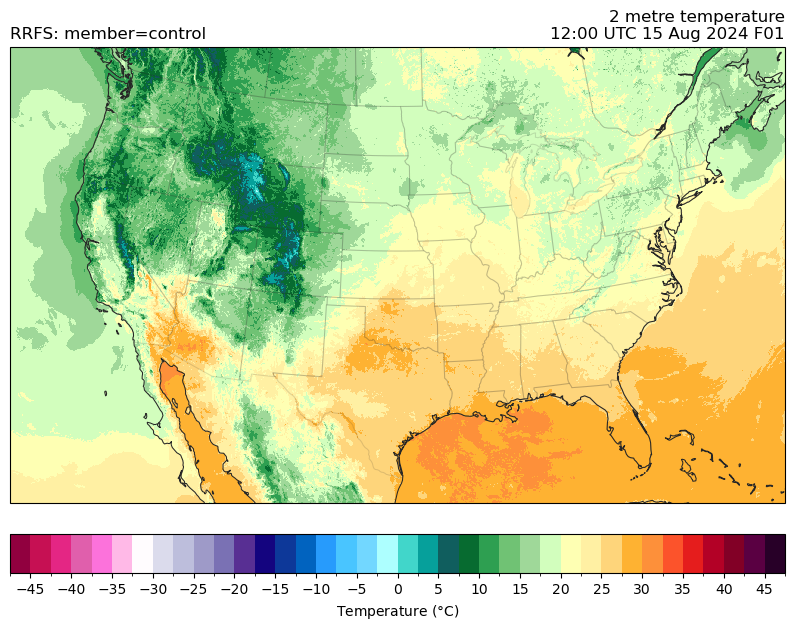

In [7]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSTemperature.cbar_kwargs2
)

ax.set_title(
    f"{ds.t2m.GRIB_name}\n{ds.time.dt.strftime('%H:%M UTC %d %b %Y').item()} F{int(ds.step.dt.total_seconds() / 60 / 60):02d}",
    loc="right",
)
ax.set_title(
    f"{H.model.upper()}: member={H.member} {H.product_description}", loc="left"
)

### Other products

> Reading natlev data into xarray causes my kernel to crash


In [8]:
H = Herbie("2024-06-22", model="rrfs", product="natlev", member="control", domain=None)
H

✅ Found ┊ model=rrfs ┊ product=natlev ┊ 2024-Jun-22 00:00 UTC F00 ┊ GRIB2 @ aws_0 ┊ IDX @ aws_0


▌▌Herbie RRFS model natlev product initialized 2024-Jun-22 00:00 UTC F00 ┊ source=aws_0

In [9]:
H.inventory("TMP:5 hybrid")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,??,search_this
91,92,467606623,478003639.0,467606623-478003639,2024-06-22,2024-06-22,TMP,5 hybrid level,anl,NaN,NaN,:TMP:5 hybrid level:anl:nan


In [10]:
ds = H.xarray("TMP:5 hybrid")
ds

<xarray.Dataset> Size: 289MB
Dimensions:              (y: 2961, x: 4881)
Coordinates:
    time                 datetime64[ns] 8B 2024-06-22
    step                 timedelta64[ns] 8B 00:00:00
    hybrid               float64 8B 5.0
    latitude             (y, x) float64 116MB -1.606 -1.591 ... 41.5 41.48
    longitude            (y, x) float64 116MB -157.3 -157.3 ... -1.81 -1.802
    valid_time           datetime64[ns] 8B 2024-06-22
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t                    (y, x) float32 58MB nan nan nan nan ... nan nan nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rrfs
    product:                 natlev
    description:             Rapid Refresh Forecast System (RRFS) Ensemble
    remote_grib:             https://noaa-rrfs-pds.s3.amazonaws.com/rrfs_a/rr...
    local_grib:              /home/blaylock/data/rrfs/20240622/control/subset...
    search:                  TMP:5 hybrid

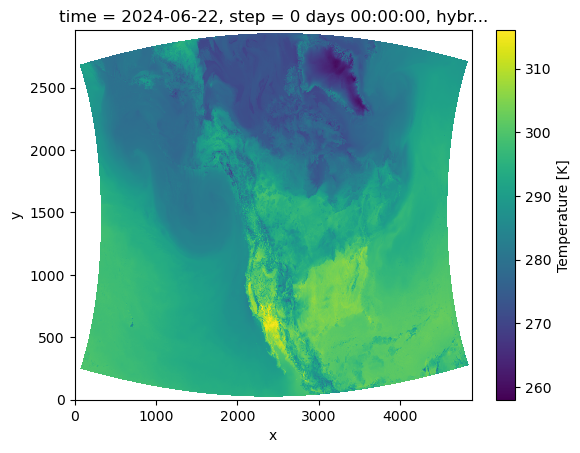

: 

In [11]:
ds.t.plot()

In [12]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSTemperature.cbar_kwargs2
)

ax.set_title(
    f"{ds.t.GRIB_name}\n{ds.time.dt.strftime('%H:%M UTC %d %b %Y').item()} F{int(ds.step.dt.total_seconds() / 60 / 60):02d}",
    loc="right",
)
ax.set_title(
    f"{H.model.upper()}: member={H.member} {H.product_description}", loc="left"
)